# Alunos

* Arthur Severo
* Victor Le Roy

# Clustering usando K-means, AgglomerativeClustering e outros

In [31]:
# IMPORTS

import scipy.io as sio
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

# Exercicio 1

In [32]:
# Obtendo os dados
data_path = "Data"
data_file = "data2.mat"

mat = sio.loadmat(data_path + "/" + data_file)
data = pd.DataFrame(mat["X"], columns=["X1", "X2"])

In [33]:
data

,X1,X2
0,1.842080,4.607572
1,5.658583,4.799964
2,6.352579,3.290854
3,2.904017,4.612204
4,3.231979,4.939894
...,...,...
295,7.302787,3.380160
296,6.991984,2.987067
297,4.825534,2.779617
298,6.117681,2.854757


a. Executar o algoritmo K-means para obter 3 clusters das amostras presentes no arquivo “data2.mat”, conforme Figura 1.

![imagem1](imgs/img_clustering_1.png)

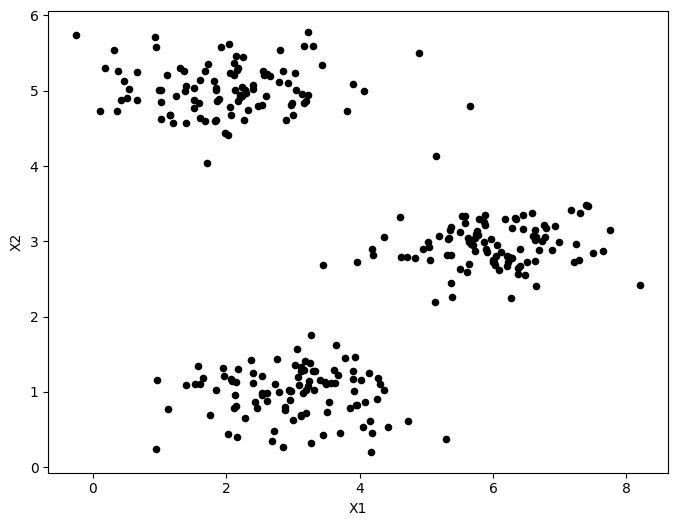

In [34]:
# Plotando os dados
plt.figure(figsize=(8, 6))
plt.scatter(data["X1"], data["X2"], color="black", s=20)
plt.xlabel("X1")
plt.ylabel("X2")
plt.show()

In [35]:
def plot_k_means(data, clusters, centroids):
    plt.figure(figsize=(8, 6))
    plt.scatter(data["X1"], data["X2"], c=clusters, cmap="viridis", s=20)
    plt.scatter(centroids[:, 0], centroids[:, 1], c="black", s=100, alpha=0.5)
    plt.xlabel("X1")
    plt.ylabel("X2")
    plt.show()

In [36]:
def k_means(data, num_clusters, max_generations):

    # Inicializando os centroides
    centroids = np.zeros((num_clusters, data.shape[1]))
    centroids[0] = data[np.random.randint(0, data.shape[0])]
    for i in range(1, num_clusters):
        distances = np.zeros((data.shape[0], i))
        for j in range(i):
            distances[:, j] = np.linalg.norm(data - centroids[j], axis=1)
        min_distances = np.min(distances, axis=1)
        min_distances = min_distances / np.sum(min_distances)
        centroids[i] = data[np.random.choice(data.shape[0], p=min_distances)]
    
    # Executando o algoritmo
    for _ in range(max_generations):
        distances = np.zeros((data.shape[0], num_clusters))
        for i in range(num_clusters):
            distances[:, i] = np.linalg.norm(data - centroids[i], axis=1)
        clusters = np.argmin(distances, axis=1)
        for i in range(num_clusters):
            centroids[i] = np.mean(data[clusters == i], axis=0)
    
    return centroids, clusters

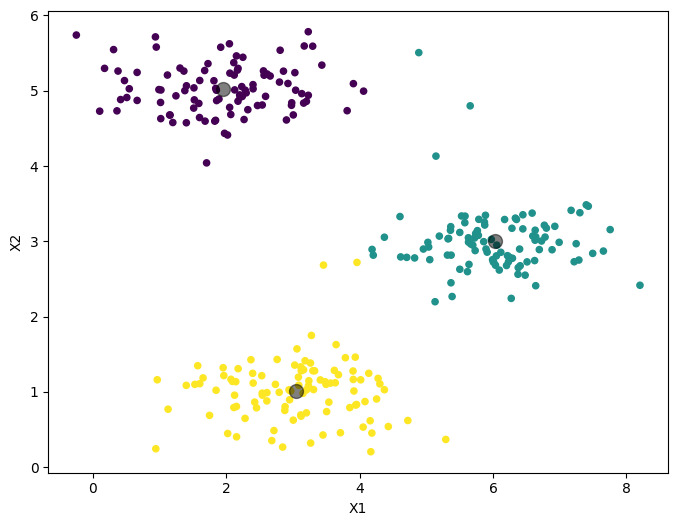

In [37]:
centroids, clusters = k_means(data.values, 3, 100)
plot_k_means(data, clusters, centroids)

A subdivisão foi boa, já que os clusters ficaram bem dividos e os centroides bem localizados nos clusters encontrados.

b. Agora ajuste o algoritmo  K-Means para diferentes números de clusters (1 a 20)

c. Para cada modelo, armazene o número de clusters e o valor da inércia (custo)

In [38]:
def calculate_model_inertia(data, clusters, centroids):
    inertia = 0
    for i in range(data.shape[0]):
        inertia += np.linalg.norm(data.values[i] - centroids[clusters[i]]) ** 2
    return inertia

In [39]:
clusters_inertia = []
for num_clusters in range(20):
  centroids, clusters = k_means(data.values, num_clusters + 1, 100)
  inertia = calculate_model_inertia(data, clusters, centroids)
  clusters_inertia.append([num_clusters + 1, inertia])
  print("Número de clusters: %d, Inertia: %.4f" % (clusters_inertia[num_clusters][0], clusters_inertia[num_clusters][1]))

Número de clusters: 1, Inertia: 1957.6547
Número de clusters: 2, Inertia: 913.3193
Número de clusters: 3, Inertia: 266.6585
Número de clusters: 4, Inertia: 211.8810
Número de clusters: 5, Inertia: 202.4531
Número de clusters: 6, Inertia: 151.9299
Número de clusters: 7, Inertia: 145.5744
Número de clusters: 8, Inertia: 133.9003
Número de clusters: 9, Inertia: 78.2884
Número de clusters: 10, Inertia: 88.1639
Número de clusters: 11, Inertia: 72.6173
Número de clusters: 12, Inertia: 58.0015
Número de clusters: 13, Inertia: 58.0914
Número de clusters: 14, Inertia: 48.2447
Número de clusters: 15, Inertia: 55.1026
Número de clusters: 16, Inertia: 43.9723
Número de clusters: 17, Inertia: 47.2149
Número de clusters: 18, Inertia: 43.7239
Número de clusters: 19, Inertia: 42.9758
Número de clusters: 20, Inertia: 34.5869


Nota-se que, quanto mais clusters utilizados, menor será a inercia. Isso é fato, uma vez que o comportamento do k-means obtem os clusters com base na distancia e como há vários clusters gerados, obtem-se uma inercia pequena

d.  Plote  a  Inércia  (custo)  versus  Nº  de  clusters.  Parece  haver  um  número ideal de cluster (método do cotovelo - elbow?)

In [40]:
def plot_cluster_inertia(clusters_inertia):
    plt.figure(figsize=(8, 6))
    plt.plot([c[0] for c in clusters_inertia], [c[1] for c in clusters_inertia])
    plt.xlabel("Número de clusters")
    plt.ylabel("Inertia")
    plt.show()

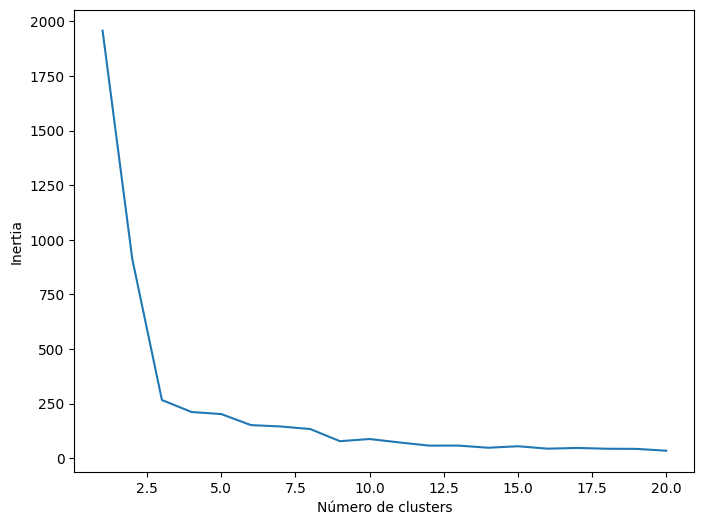

In [41]:
plot_cluster_inertia(clusters_inertia)

A partir do gráfico pode-se concluir que o número de cluster ideal é próximo a 3. Isso acontece por conta do cotovelo gerado no gráfico

e. Ajuste um modelo de agrupamento aglomerativo hierárquico (Hierarchical  Agglomerative  Clustering)  com  três  clusters  (escolha  e teste diferentes tipos de linkage)

In [42]:
def plot_agg_clustering_unifying_plots(data, arr_clusters, titles=None):
    plt.figure(figsize=(16, 6))
    for i in range(len(arr_clusters)):
        plt.subplot(1, len(arr_clusters), i + 1)
        plt.scatter(data["X1"], data["X2"], c=arr_clusters[i], cmap="viridis", s=20)
        plt.xlabel("X1")
        plt.ylabel("X2")
        plt.title(f"{titles is not None and titles[i] or ''}")
    plt.show()

In [43]:
def plot_agg_clustering(data, clusters):
    plt.figure(figsize=(8, 6))
    plt.scatter(data["X1"], data["X2"], c=clusters, cmap="viridis", s=20)
    plt.xlabel("X1")
    plt.ylabel("X2")
    plt.show()

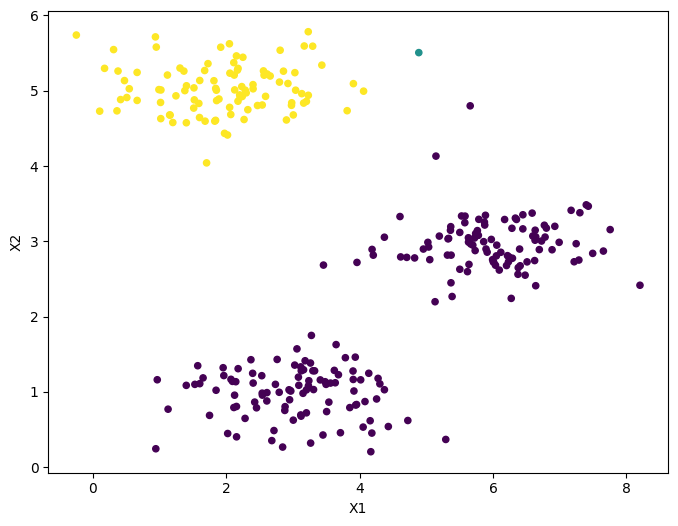

In [44]:
agg_single = AgglomerativeClustering(n_clusters=3, linkage="single")
agg_single_predict = agg_single.fit_predict(data)
plot_agg_clustering(data, agg_single_predict)

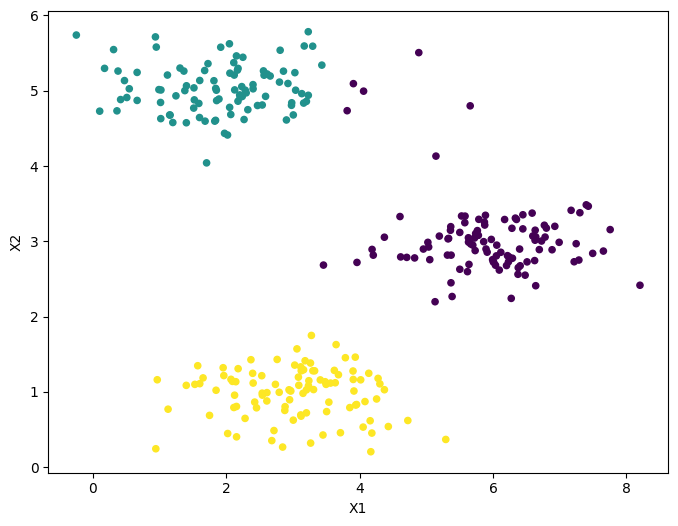

In [45]:
agg_complete = AgglomerativeClustering(n_clusters=3, linkage="complete")
agg_complete_predict = agg_complete.fit_predict(data)
plot_agg_clustering(data, agg_complete_predict)

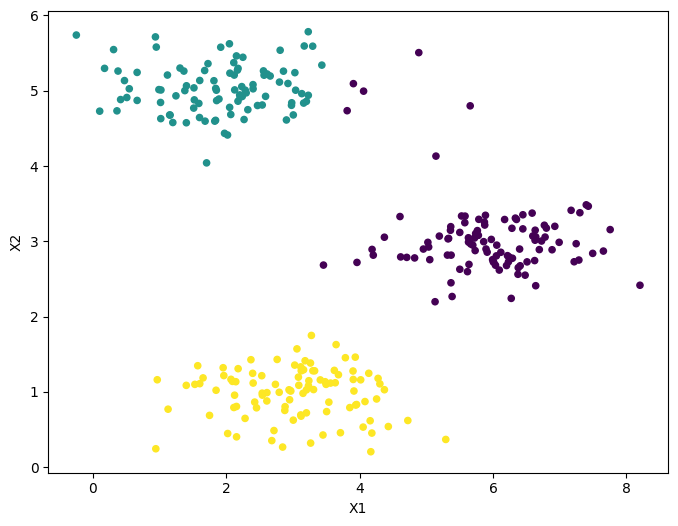

In [46]:
agg_average = AgglomerativeClustering(n_clusters=3, linkage="average")
agg_average_predict = agg_average.fit_predict(data)
plot_agg_clustering(data, agg_average_predict)

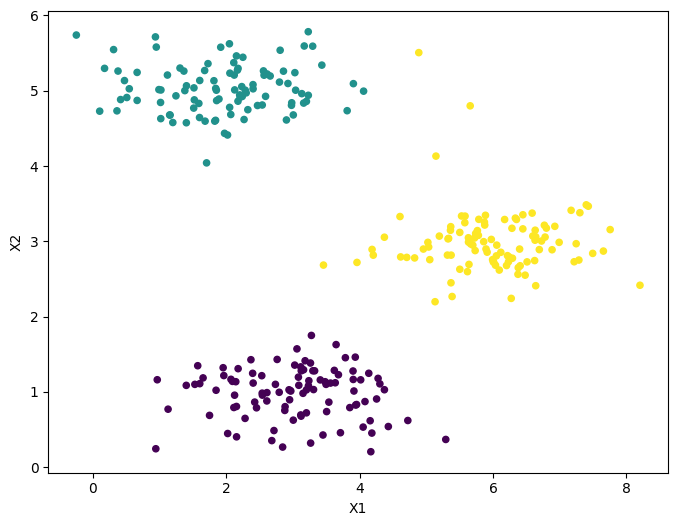

In [47]:
agg_ward = AgglomerativeClustering(n_clusters=3, linkage="ward")
agg_ward_predict = agg_ward.fit_predict(data)
plot_agg_clustering(data, agg_ward_predict)

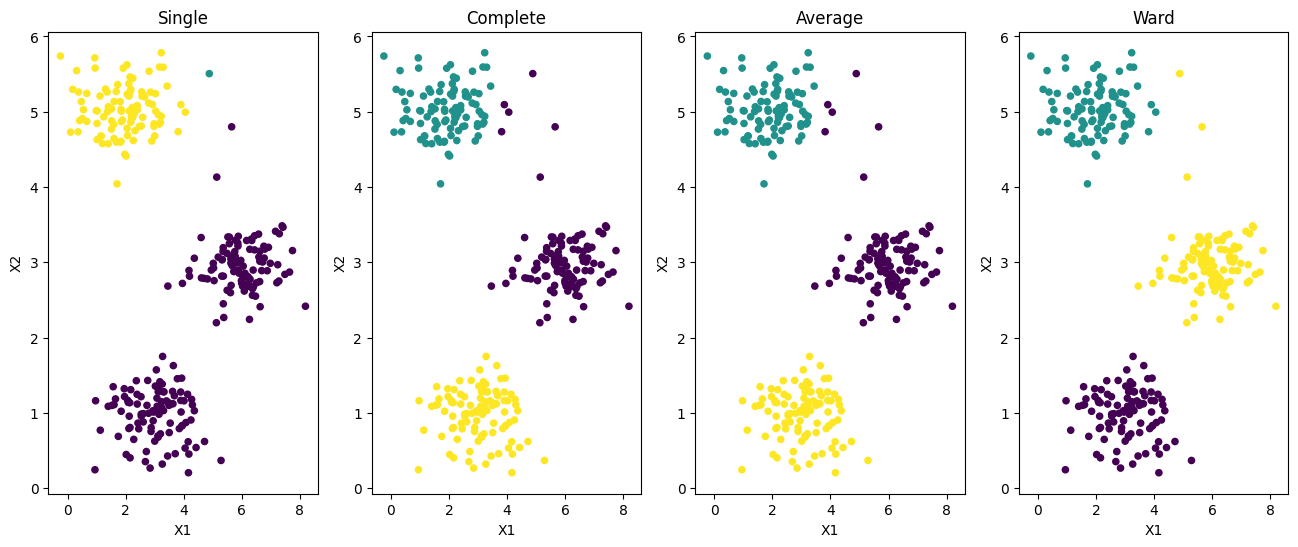

In [48]:
plot_agg_clustering_unifying_plots(data, [agg_single_predict, agg_complete_predict, agg_average_predict, agg_ward_predict], ["Single", "Complete", "Average", "Ward"])

f. Compare os resultados com os obtidos pelo k-means

* Nota-se que a divisão utilizada pelos métodos hierárquicos há uma certa similaridade com o gerado pelo k-means. O que mais se afasta é o agglomerative utilizando o `linkage = single`.

* No Agglomerative vemos que, pela natureza do algoritmo, os clusters foram bem divididos, assim como o k-means, com excessão do linkage `single`, que considera a distância mínima entre os elementos para gerar essa clusterização. Entre os outros três linkages, percebe-se uma similaridade entre os resultados, o que pode demonstrar que os resultados obtidos foram próximos ao melhor possível para a utilização de 3 clusters utilizando o método Agglomerative.

* Entre os métodos utilizados, o melhor resultado, e o mais próximo do k-means, foi o utilizando `linkage = ward`. Isso acontece devido a natureza da ligação, que procura sempre pela melhor inercia possível do problema. 

g. Visualize o dendrograma produzido pelo método de agrupamento aglomerativo  Dica:  O  SciPy  tem  um  módulo  chamado  `cluster.hierarchy` que contém as funções de linkage    e    dendrogram    necessárias para criar o mapa de ligação (linkage) e traçar o dendrograma resultante

In [49]:
def plot_dendrogram(data, method="ward"):
    plt.figure(figsize=(8, 6))
    dendrogram = sch.dendrogram(sch.linkage(data, method=method))
    plt.xlabel("X1")
    plt.ylabel("X2")
    plt.show()

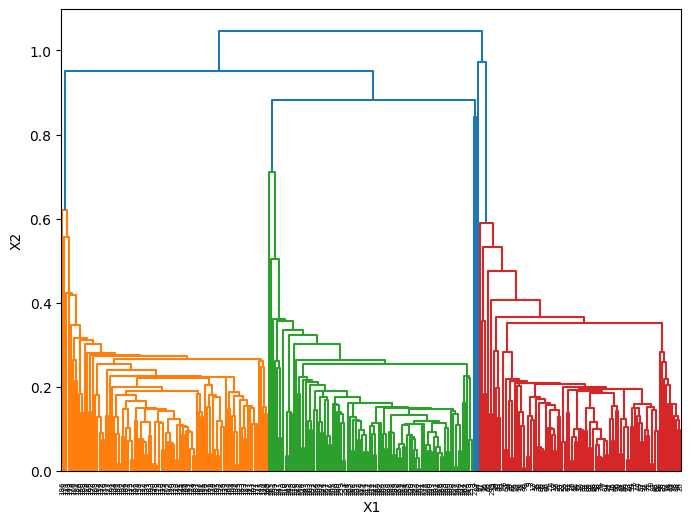

In [50]:
plot_dendrogram(data, "single")

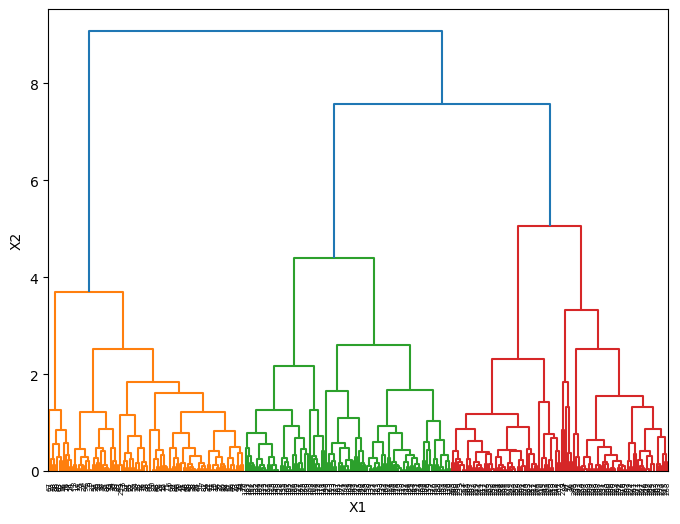

In [51]:
plot_dendrogram(data, "complete")

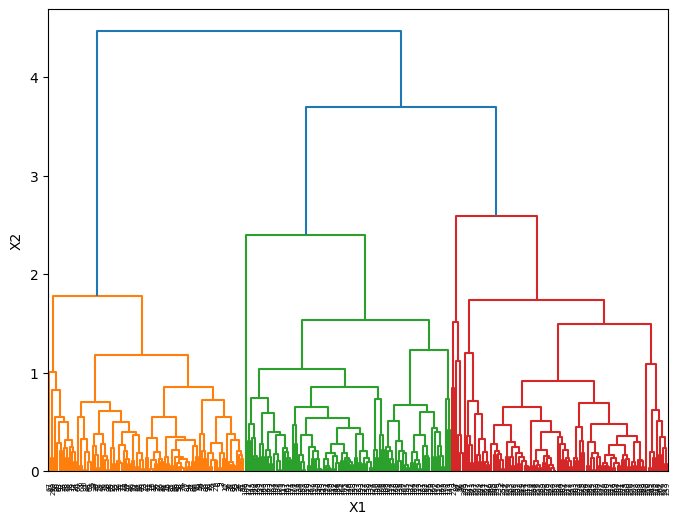

In [52]:
plot_dendrogram(data, "average")

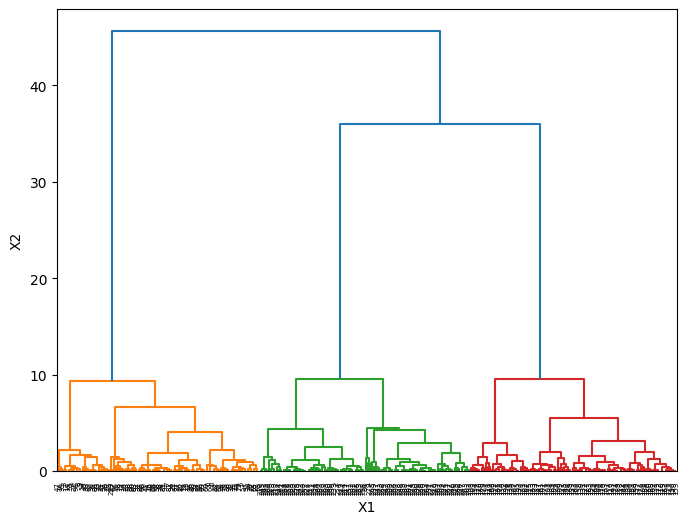

In [53]:
plot_dendrogram(data, "ward")

# Exercicio 2

In [54]:
# Obtendo os dados
data_path = "Data"
data_file = "bird_small.mat"

mat = sio.loadmat(data_path + "/" + data_file)

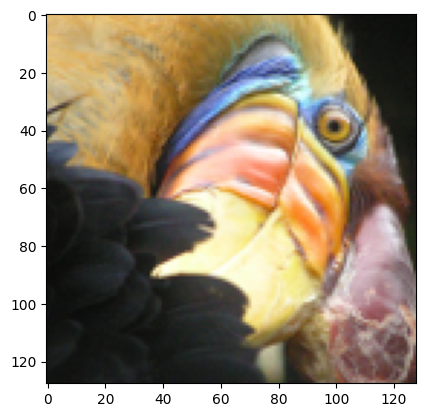

In [55]:
plt.imshow(mat["A"])

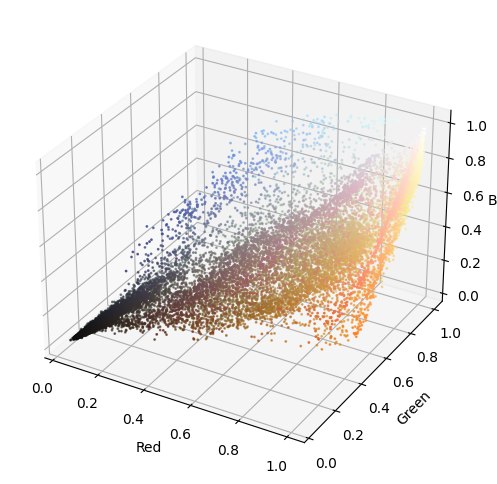

In [56]:
image_16_color = mat["A"].reshape(-1, 3) / 255

red = image_16_color[:, 0]
green = image_16_color[:, 1]
blue = image_16_color[:, 2]

plot = plt.figure(figsize=(8, 6))
ax = plot.add_subplot(111, projection="3d")
ax.scatter(red, green, blue, c=image_16_color, s=1)
ax.set_xlabel("Red")
ax.set_ylabel("Green")
ax.set_zlabel("Blue")
plt.show()

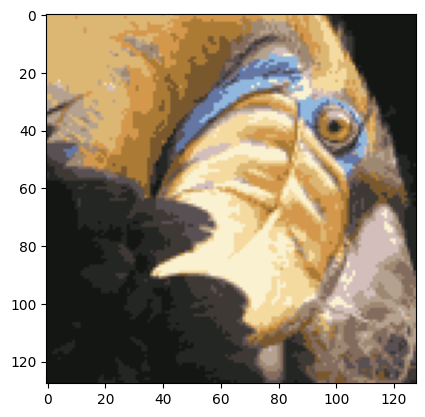

In [57]:
centroids, clusters = k_means(image_16_color, 16, 100)

image_16_color_compressed = np.zeros(image_16_color.shape)
for i in range(image_16_color.shape[0]):
    image_16_color_compressed[i] = centroids[clusters[i]]

image_16_color_compressed = image_16_color_compressed.reshape(mat["A"].shape)

plt.imshow(image_16_color_compressed)

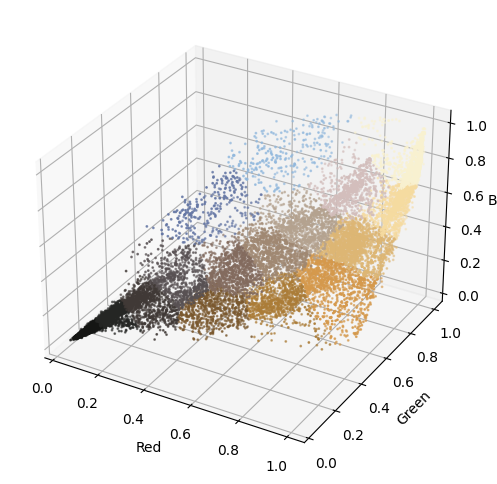

In [58]:
plot = plt.figure(figsize=(8, 6))
ax = plot.add_subplot(111, projection="3d")
ax.scatter(red, green, blue, c=image_16_color_compressed.reshape(-1, 3), s=1)
ax.set_xlabel("Red")
ax.set_ylabel("Green")
ax.set_zlabel("Blue")
plt.show()

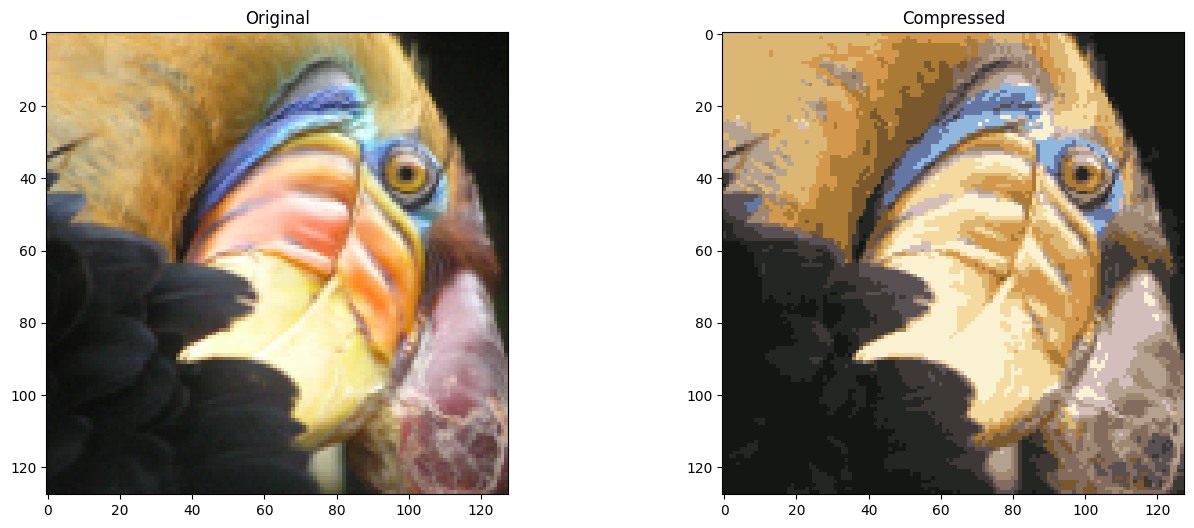

In [59]:
# Comparing both images
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
plt.title("Original")
plt.imshow(mat["A"])
plt.subplot(1, 2, 2)
plt.title("Compressed")
plt.imshow(image_16_color_compressed)
plt.show()